In [1]:
!pip install pandas
!pip install sqlalchemy

In [5]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel(r'C:\Users\venuv\OneDrive\Desktop\final assignment\Customer Behavior and Marketing Analytics Cleaned.xlsx')

In [6]:
from sqlalchemy import create_engine

# Create an in-memory SQLite database
engine = create_engine('sqlite://', echo=False)

# Load the DataFrame into the database
df.to_sql('customer_data', con=engine, index=False, if_exists='replace')

5000

In [11]:
import pandas as pd

# Run the SQL query
query = "SELECT * FROM customer_data LIMIT 10;"
df = pd.read_sql_query(query, engine)

# Display the result
df

Customer ID    Segment  Gender  Age  Income Region  \
0   CUST00001  Segment B   Other   33   74757  North   
1   CUST00002  Segment A    Male   28  112280  North   
2   CUST00003  Segment D  Female   24   30596   East   
3   CUST00004  Segment A  Female   30  123736  South   
4   CUST00005  Segment A    Male   34   31823   East   
5   CUST00006  Segment D    Male   58  144743   West   
6   CUST00007  Segment A  Female   22   98529   East   
7   CUST00008  Segment B    Male   48  118170   West   
8   CUST00009  Segment A    Male   40   40622  North   
9   CUST00010  Segment D    Male   35   43672  North   

                 Sign-up Date          Last Purchase Date Marital Status  \
0  2021-12-09 00:00:00.000000  2023-03-27 00:00:00.000000        Married   
1  2022-12-06 00:00:00.000000  2022-04-08 00:00:00.000000        Widowed   
2  2020-10-28 00:00:00.000000  2024-05-13 00:00:00.000000        Widowed   
3  2023-11-19 00:00:00.000000  2023-09-16 00:00:00.000000        Widowed   
4  2024-04-11 00:00:00.000000  2021-12-10 00:00:00.000000        Married   
5  2021-06-20 00:00:00.000000  2021-05-19 00:00:00.000000        Married   
6  2021-09-16 00:00:00.000000  2023-07-20 00:00:00.000000       Divorced   
7  2021-11-24 00:00:00.000000  2021-05-07 00:00:00.000000         Single   
8  2023-01-11 00:00:00.000000  2022-04-03 00:00:00.000000         Single   
9  2023-06-01 00:00:00.000000  2021-02-25 00:00:00.000000       Divorced   

     Education Occupation  Number of Children       Home Ownership  \
0      Masters    Teacher                   1                  Own   
1  High School     Doctor                   3  Living with Parents   
2          PhD     Artist                   2                 Rent   
3    Bachelors     Artist                   3  Living with Parents   
4  High School     Artist                   1                 Rent   
5  High School    Teacher                   4                  Own   
6    Bachelors     Doctor                   3                 Rent   
7    Bachelors   Engineer                   4  Living with Parents   
8      Masters      Other                   1  Living with Parents   
9  High School   Engineer                   0  Living with Parents   

  Vehicle Ownership Subscription Level  
0                No               Free  
1                No            Premium  
2                No              Basic  
3               Yes            Premium  
4                No            Premium  
5                No               Free  
6               Yes            Premium  
7               Yes            Premium  
8                No            Premium  
9                No                VIP

### Fetching and displaying the column names in the table

In [16]:
query = "PRAGMA table_info(customer_data);"
df_columns = pd.read_sql_query(query, engine)
df_columns

cid                name      type  notnull dflt_value  pk
0     0         Customer ID      TEXT        0       None   0
1     1             Segment      TEXT        0       None   0
2     2              Gender      TEXT        0       None   0
3     3                 Age    BIGINT        0       None   0
4     4              Income    BIGINT        0       None   0
5     5              Region      TEXT        0       None   0
6     6        Sign-up Date  DATETIME        0       None   0
7     7  Last Purchase Date  DATETIME        0       None   0
8     8      Marital Status      TEXT        0       None   0
9     9           Education      TEXT        0       None   0
10   10          Occupation      TEXT        0       None   0
11   11  Number of Children    BIGINT        0       None   0
12   12      Home Ownership      TEXT        0       None   0
13   13   Vehicle Ownership      TEXT        0       None   0
14   14  Subscription Level      TEXT        0       None   0

### Count of Customers by Gender

In [14]:
query = """
SELECT 
    Gender,
    COUNT(*) as count
FROM 
    customer_data
GROUP BY 
    Gender;
"""
df = pd.read_sql_query(query, engine)
df

Gender  count
0  Female   1683
1    Male   1665
2   Other   1652

### group customers by age and count the number of customers in each age group

In [28]:
query = """
SELECT 
    CASE 
        WHEN Age BETWEEN 18 AND 25 THEN '18-25'
        WHEN Age BETWEEN 26 AND 35 THEN '26-35'
        WHEN Age BETWEEN 36 AND 45 THEN '36-45'
        WHEN Age BETWEEN 46 AND 60 THEN '46-60'
        ELSE '60+'
    END as age_group,
    COUNT(*) as customer_count
FROM 
    customer_data
GROUP BY 
    age_group;
"""

df = pd.read_sql_query(query, engine)
df

age_group  customer_count
0     18-25             790
1     26-35             962
2     36-45             946
3     46-60            1407
4       60+             895

### Top 5 Customers by Income

In [29]:
query = """
SELECT 
    [Customer ID], 
    Income
FROM 
    customer_data
ORDER BY 
    Income DESC
LIMIT 5;
"""

df = pd.read_sql_query(query, engine)
df

Customer ID  Income
0   CUST03971  149994
1   CUST02939  149947
2   CUST00999  149807
3   CUST04693  149806
4   CUST02107  149802

### Distribution of Income

C:\New folder\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


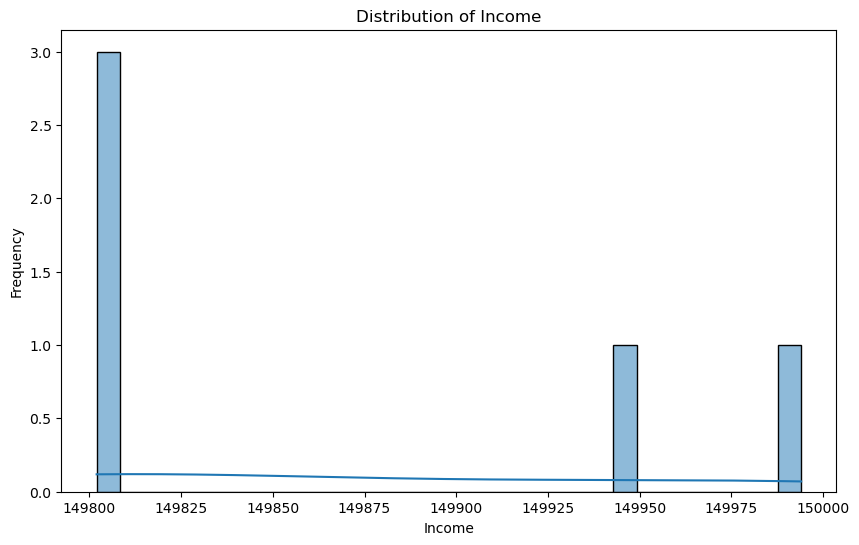

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(df['Income'], bins=30, kde=True)

# Adding titles and labels
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()

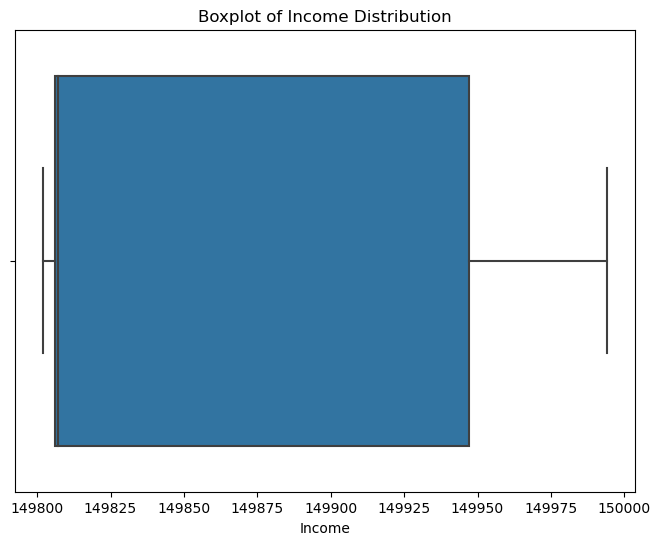

In [34]:
# Set up the plot
plt.figure(figsize=(8, 6))

# Create a boxplot
sns.boxplot(x=df['Income'])

# Adding title
plt.title('Boxplot of Income Distribution')

# Show the plot
plt.show()

### Customer Segmentation by Income and Age

In [26]:
query = """
SELECT 
    CASE 
        WHEN Age BETWEEN 18 AND 25 THEN '18-25'
        WHEN Age BETWEEN 26 AND 35 THEN '26-35'
        WHEN Age BETWEEN 36 AND 45 THEN '36-45'
        WHEN Age BETWEEN 46 AND 60 THEN '46-60'
        ELSE '60+'
    END as age_group,
    CASE 
        WHEN Income < 30000 THEN '<30K'
        WHEN Income BETWEEN 30000 AND 60000 THEN '30K-60K'
        WHEN Income BETWEEN 60001 AND 100000 THEN '60K-100K'
        ELSE '>100K'
    END as income_bracket,
    COUNT(*) as customer_count
FROM 
    customer_data
GROUP BY 
    age_group, income_bracket;
"""
df = pd.read_sql_query(query, engine)
df

age_group income_bracket  customer_count
0      18-25        30K-60K             172
1      18-25       60K-100K             285
2      18-25          >100K             333
3      26-35        30K-60K             257
4      26-35       60K-100K             309
5      26-35          >100K             396
6      36-45        30K-60K             217
7      36-45       60K-100K             306
8      36-45          >100K             423
9      46-60        30K-60K             368
10     46-60       60K-100K             453
11     46-60          >100K             586
12       60+        30K-60K             205
13       60+       60K-100K             287
14       60+          >100K             403

### Distribution of Customers by Segment    

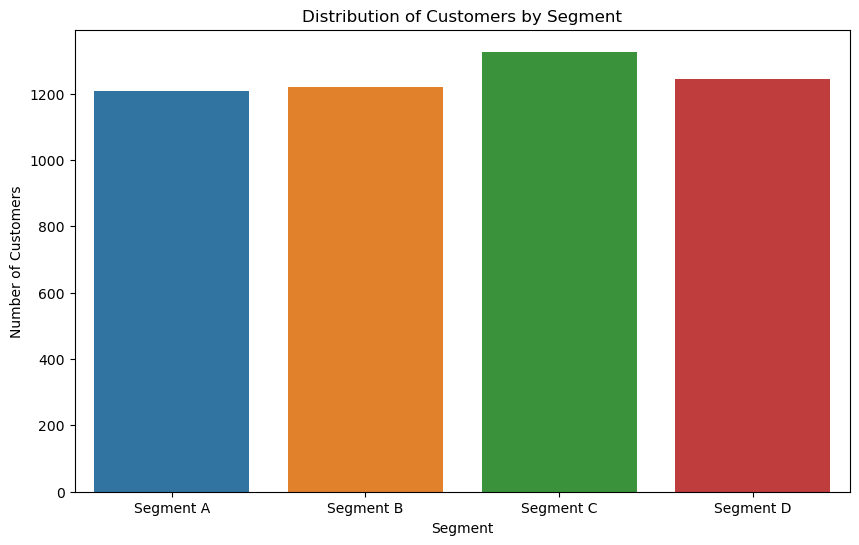

In [38]:
query = """
SELECT 
    Segment, 
    COUNT([Customer ID]) as Customer_Count
FROM 
    customer_data
GROUP BY 
    Segment;
"""

import matplotlib.pyplot as plt
import seaborn as sns

# Execute the SQL query
query = """
SELECT 
    Segment, 
    COUNT([Customer ID]) as Customer_Count
FROM 
    customer_data
GROUP BY 
    Segment;
"""
df_segment = pd.read_sql_query(query, engine)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Customer_Count', data=df_segment)
plt.title('Distribution of Customers by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

### Average Income by Region

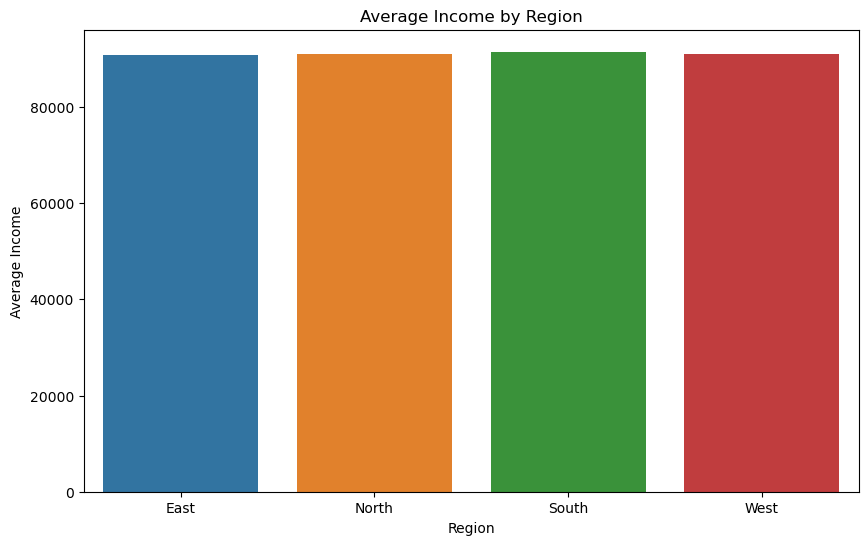

In [41]:
query = """
SELECT 
    Region, 
    COUNT([Customer ID]) as Customer_Count
FROM 
    customer_data
GROUP BY 
    Region;
"""

# Execute the SQL query
query = """
SELECT 
    Region, 
    AVG(Income) as Average_Income
FROM 
    customer_data
GROUP BY 
    Region;
"""
df_region_income = pd.read_sql_query(query, engine)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Average_Income', data=df_region_income)
plt.title('Average Income by Region')
plt.xlabel('Region')
plt.ylabel('Average Income')
plt.show()

### Customer Count by Age Group

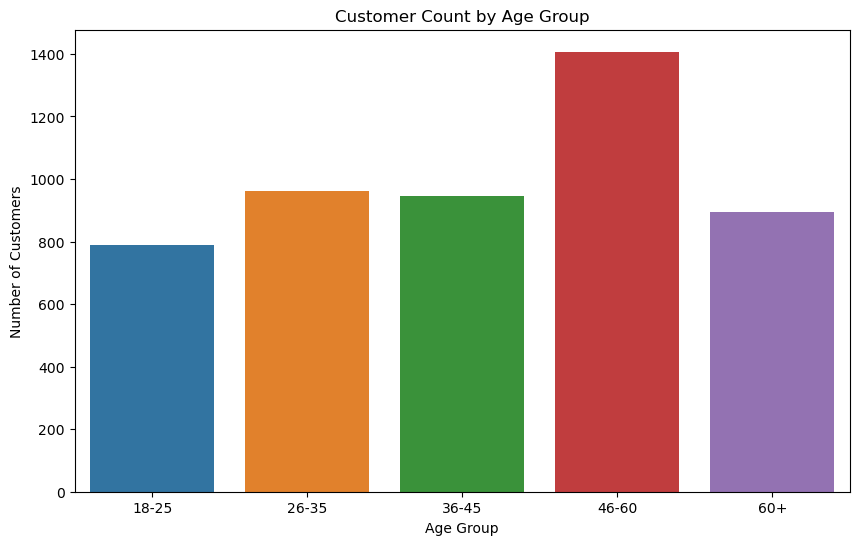

In [46]:
query = """
SELECT 
    CASE 
        WHEN Age BETWEEN 18 AND 25 THEN '18-25'
        WHEN Age BETWEEN 26 AND 35 THEN '26-35'
        WHEN Age BETWEEN 36 AND 45 THEN '36-45'
        WHEN Age BETWEEN 46 AND 60 THEN '46-60'
        ELSE '60+' 
    END as Age_Group,
    COUNT([Customer ID]) as Customer_Count
FROM 
    customer_data
GROUP BY 
    Age_Group;
"""

# Execute the SQL query
query = """
SELECT 
    CASE 
        WHEN Age BETWEEN 18 AND 25 THEN '18-25'
        WHEN Age BETWEEN 26 AND 35 THEN '26-35'
        WHEN Age BETWEEN 36 AND 45 THEN '36-45'
        WHEN Age BETWEEN 46 AND 60 THEN '46-60'
        ELSE '60+' 
    END as Age_Group,
    COUNT([Customer ID]) as Customer_Count
FROM 
    customer_data
GROUP BY 
    Age_Group;
"""
df_age_group = pd.read_sql_query(query, engine)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Customer_Count', data=df_age_group)
plt.title('Customer Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

### Income Distribution by Gender

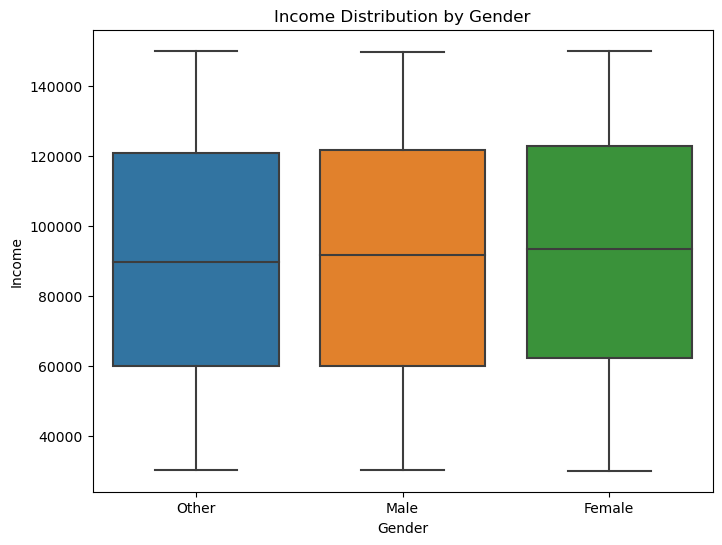

In [49]:
query = """
SELECT 
    Gender, 
    Income
FROM 
    customer_data;
"""

# Execute the SQL query
query = """
SELECT 
    Gender, 
    Income
FROM 
    customer_data;
"""
df_income_gender = pd.read_sql_query(query, engine)

# Plot a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Income', data=df_income_gender)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

### Correlation between Age and Income

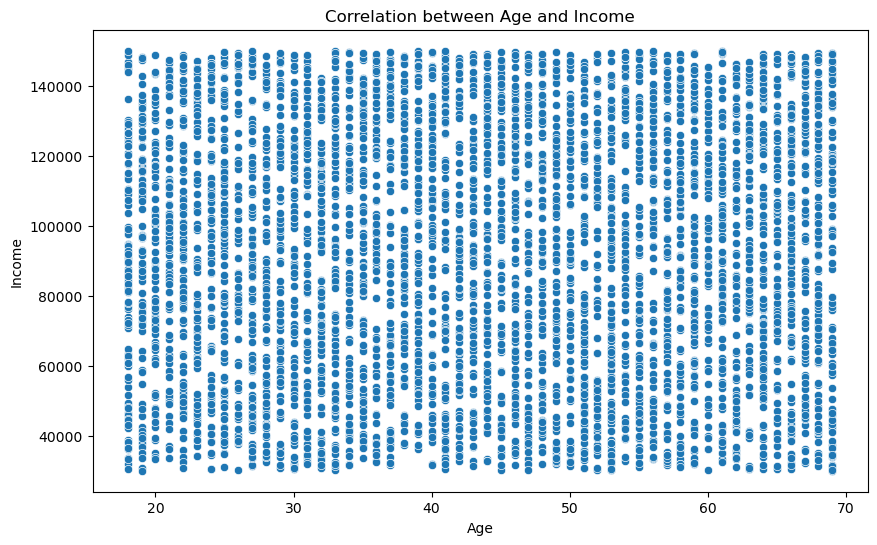

Correlation between Age and Income: 0.004260636985907365


In [51]:
query = """
SELECT 
    Age, 
    Income
FROM 
    customer_data;
"""

# Execute the SQL query
query = """
SELECT 
    Age, 
    Income
FROM 
    customer_data;
"""
df_age_income = pd.read_sql_query(query, engine)

# Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df_age_income)
plt.title('Correlation between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Calculate and display the correlation coefficient
correlation = df_age_income.corr()
print("Correlation between Age and Income:", correlation.loc['Age', 'Income'])